#     NAME : ANUP RAI
##     (Data Science & Business Anlaytics Intern)

##    Prediction Using Supervised ML

In this task, we have to predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

I am using Python for this task. I will use scikit-learn package to make a Linear Regression model for this task.

In [1]:
# Importing all libraries required in this notebook

import pandas as pd               #for data manipulation and working with csv files
import numpy as np                # for numerical computation 
import matplotlib.pyplot as plt   # for plotting graphs


# Importing Various important elements from scikit-learn library

from sklearn.linear_model import LinearRegression      # for linear_regression model
from sklearn.model_selection import train_test_split   # for splitting dataset into train and test data

Now, we have to download the dataset from the link provided.

In [2]:
# Reading data from remote link provided

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking the Dataset

Let's check the various attributes and aspects of our dataset 

In [3]:
# Checking the number of rows and columns in the dataset

data.shape

(25, 2)

In [4]:
# Checking numerical data 

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking basic information about all columns in our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# Checking number of unique values in each columns of dataset

data.nunique()

Hours     23
Scores    23
dtype: int64

In [7]:
# Checking the correlation between columns

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
# Checking the null values in dataset

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there are no missing or duplicate data in this dataset, we dont need to perform any data cleaning and we can move further to prepare data for our model.

Now, let's plot a graph using matplotlib between the columns in the dataset, in order to understand their relationship with each other better.

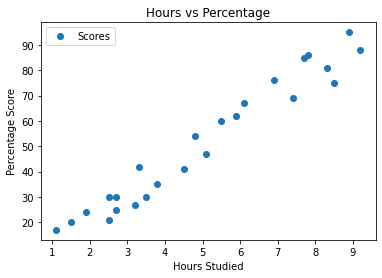

In [9]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

We are going to divide this dataset columns into inputs and targets. Inputs are the values that we would provide to the machine and targets are values that we want our model to predict.

In [10]:
# Dividing the dataset columns into inputs and targets

inputs = data.iloc[:,:-1].values
targets = data.iloc[:,1].values

In [11]:
# Splitting the data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.2,random_state=42)

Taking a look at all sets of data that we splitted

In [12]:
x_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [13]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [14]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [15]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

## Training Our Linear Regression Model

In [16]:
# Instantiating the LinearRegression Model

model = LinearRegression()

In [17]:
# Fitting the data to our model

model.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'Linear Regression Line')

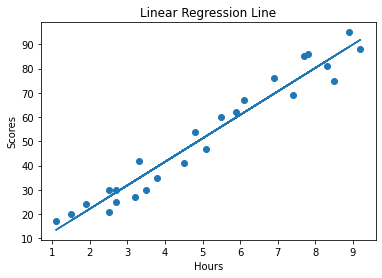

In [18]:
# Plotting the Linear Regression Line

line = model.coef_*inputs + model.intercept_
plt.scatter(inputs, targets)
plt.plot(inputs, line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression Line')

## Testing Our Linear Regression Model

In [19]:
# Predicting the scores for our test set

predict = model.predict(x_test)

In [20]:
# Comparing the Actual and Predicted Values by storing them in dataframe

compare = pd.DataFrame({'Actual': y_test, 'Predicted': predict})  
compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


<AxesSubplot:xlabel='Hours', ylabel='Score'>

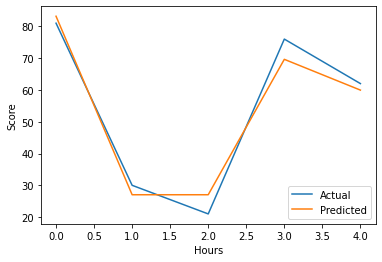

In [21]:
# Plotting the graph for actual vs predicted values

compare.plot(kind='line',xlabel='Hours',ylabel='Score')

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261495


## Evaluation Of Our Linear Regression Model

At last, we want to check how good our model is in working with data that it hasn't seen before. We can use various methods for that. Here, we are going to see the 3 most used evaluation methods in Linear Regression - r2 score, RMSE and mean absolute error.

In [23]:
# importing r2_score for model evaluation

from sklearn.metrics import r2_score

r2_score(y_test,predict)

0.9678055545167993

In [24]:
# importing RMSE(Root Mean Squared Error) for model evaluation

from sklearn.metrics import mean_squared_error

val_rmse = mean_squared_error(y_test,predict,squared=False)

print('The RMSE loss for the test set is {}.'.format(val_rmse))

The RMSE loss for the test set is 4.352380006653289.


In [25]:
# importing mean_absolute_error for model evaluation

from sklearn.metrics import mean_absolute_error  

print('Mean Absolute Error:', mean_absolute_error(y_test, predict))

Mean Absolute Error: 3.920751190209927
